# **IPL 2022 `Capstone Project`**:
### **The Indian Premier League (IPL) is a professional T20 cricket league in India, featuring franchises representing cities. This project explores IPL 2022 match-level data to derive meaningful insights and understand match outcomes, player performances, and team dynamics.**

### **column names: Variable Type**
* ### `date` : `string`  
* ### `venue` : `string`  
* ### `stage` : `string`  
* ### `team1` : `string`  
* ### `team2` : `string`  
* ### `toss_winner` : `string`  
* ### `toss_decision` : `string`  
* ### `first_ings_score` : `integer`  
* ### `second_ings_score` : `integer`  
* ### `match_winner` : `string`  
* ### `won_by` : `string`  
* ### `margin` : `integer`  
* ### `player_of_the_match` : `string`  
* ### `top_scorer` : `string`  
* ### `highscore` : `integer`  
* ### `best_bowling` : `string`  
* ### `best_bowling_fgure` : `string`  
* ### `gure` : `string`  

### Loading the Libraries and Dataset

In [65]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

IPL2022_df = pd.read_csv( 'IPL2022.csv')

IPL2022_df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


## **Basic Information**:

In [66]:
IPL2022_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

## Checking the shape(rows x columns) of IPL 2022 dataset:

In [67]:
print(f"Total rows are {IPL2022_df.shape[0]} and columns {IPL2022_df.shape[1]}")

Total rows are 74 and columns 20


## **Checking for null values in total**.

In [68]:
IPL2022_df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

# **Some Questions/Queries**:

## **1. Team that won the most matches:**

<Axes: xlabel='Count', ylabel='match_winner'>

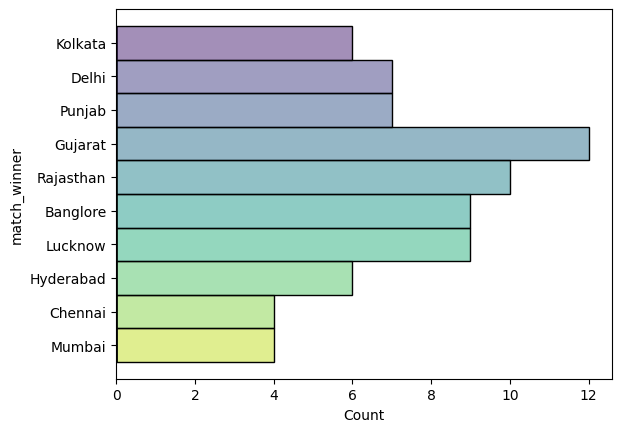

In [69]:
sns.histplot(data=IPL2022_df, y='match_winner', hue='match_winner', palette='viridis', legend=False)

<Axes: ylabel='match_winner'>

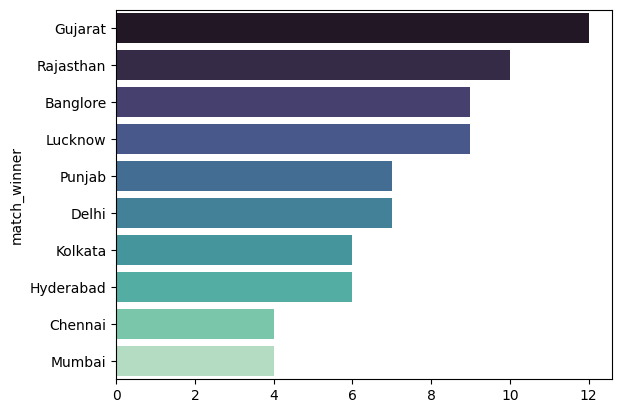

In [70]:
most_match_winner=IPL2022_df['match_winner'].value_counts()
sns.barplot(y=most_match_winner.index, x=most_match_winner.values, palette='mako')

## **2. Toss Decision Trends:**
* ### Plot a graph to show the calling of toss winning teams, Batting or Fielding.

In [71]:
IPL2022_df['toss_decision'].value_counts()

toss_decision
Field    59
Bat      15
Name: count, dtype: int64

<Axes: xlabel='toss_decision', ylabel='count'>

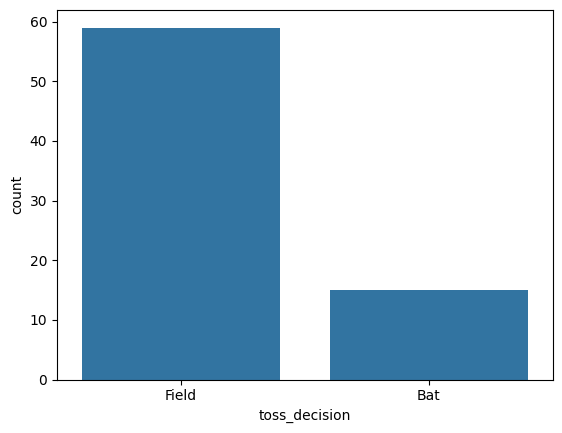

In [72]:
sns.countplot(x = IPL2022_df['toss_decision'])

<Axes: xlabel='toss_decision', ylabel='Count'>

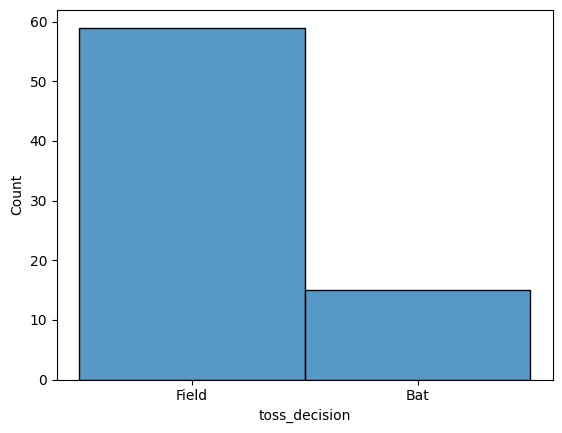

In [73]:
sns.histplot(data=IPL2022_df, x='toss_decision')

## **3. Toss Winner vs Match Winner:**
* ### Plot to show that how many matches did the Toss winning team won.

In [74]:
filter_condition=IPL2022_df['match_winner']==IPL2022_df['toss_winner']
both_toss_match_winner=IPL2022_df[filter_condition]['match_winner'].value_counts()
both_toss_match_winner

match_winner
Gujarat      7
Kolkata      5
Hyderabad    5
Delhi        4
Lucknow      4
Banglore     4
Mumbai       3
Rajasthan    2
Punjab       1
Chennai      1
Name: count, dtype: int64

In [75]:
filter_condition2=IPL2022_df['match_winner']!=IPL2022_df['toss_winner']
match_won_toss_lost=IPL2022_df[filter_condition2]['match_winner'].value_counts()
match_won_toss_lost

match_winner
Rajasthan    8
Punjab       6
Gujarat      5
Lucknow      5
Banglore     5
Delhi        3
Chennai      3
Mumbai       1
Kolkata      1
Hyderabad    1
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='count'>

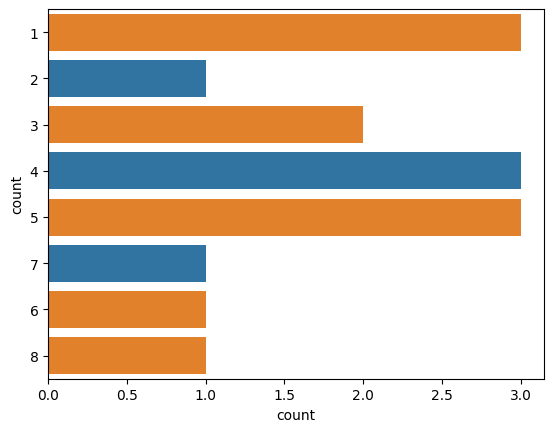

In [95]:
sns.countplot(y=both_toss_match_winner)
sns.countplot(y=match_won_toss_lost)

<Axes: ylabel='match_winner'>

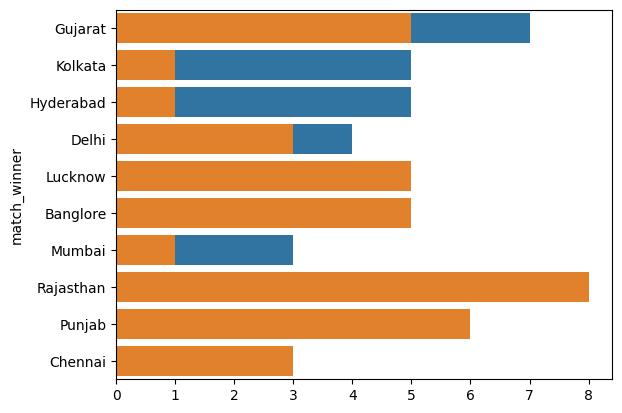

In [ ]:
sns.barplot(x=both_toss_match_winner.values, y=both_toss_match_winner.index)
sns.barplot(x=match_won_toss_lost.values, y=match_won_toss_lost.index)

## **4. How do teams win? (Runs vs Wickets):**

<Axes: xlabel='won_by', ylabel='Count'>

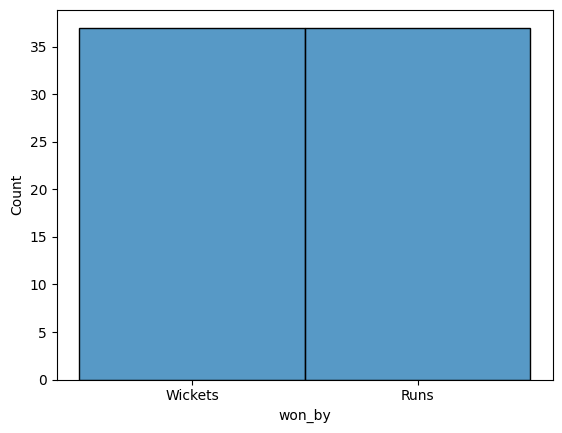

In [97]:
sns.histplot(data=IPL2022_df, x='won_by')

<Axes: xlabel='won_by', ylabel='count'>

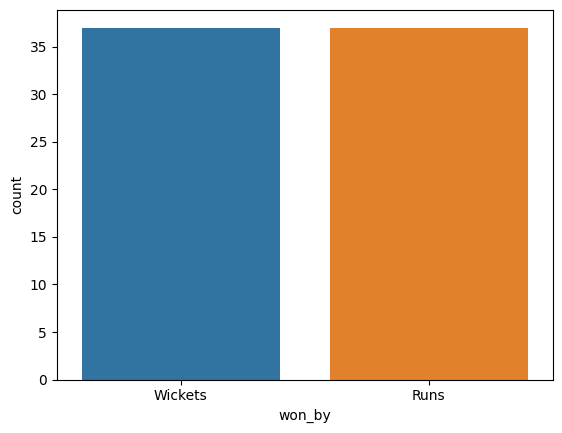

In [98]:
sns.countplot(data=IPL2022_df, x='won_by', hue='won_by')

# **Questions on Key Player Performances:**

## **1. Most "Player of the Match" Awards**

In [ ]:
count = IPL2022_df['player_of_the_match'].value_counts()
count.head(10)

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Wanindu Hasaranga    2
Umesh Yadav          2
Quinton de Kock      2
Shubman Gill         2
Avesh Khan           2
Dinesh Karthik       2
Hardik Pandya        2
Rahul Tripathi       2
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 plauers with man of the match')

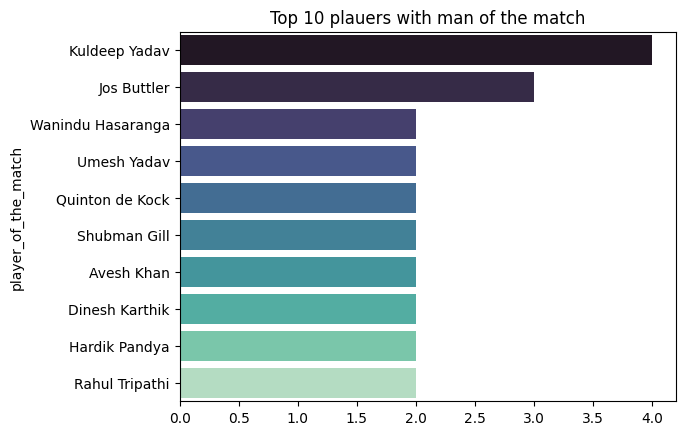

In [ ]:
sns.barplot(x = count.values , y = count.index, palette='mako')
plt.title("Top 10 plauers with man of the match")

## **2. Top Scorers:**

In [80]:
IPL2022_df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [81]:
high = IPL2022_df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)
high

top_scorer
Jos Buttler        651
Quinton de Kock    377
Name: highscore, dtype: int64

<Axes: ylabel='top_scorer'>

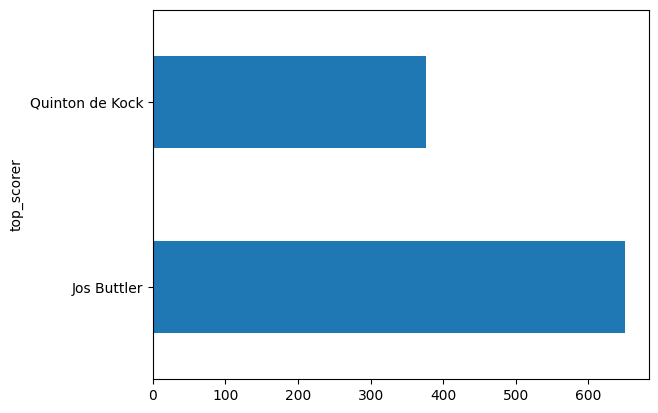

In [ ]:
high.plot(kind='barh')

## **10 Best Bowling Figures:**

In [83]:
IPL2022_df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


<Axes: ylabel='best_bowling'>

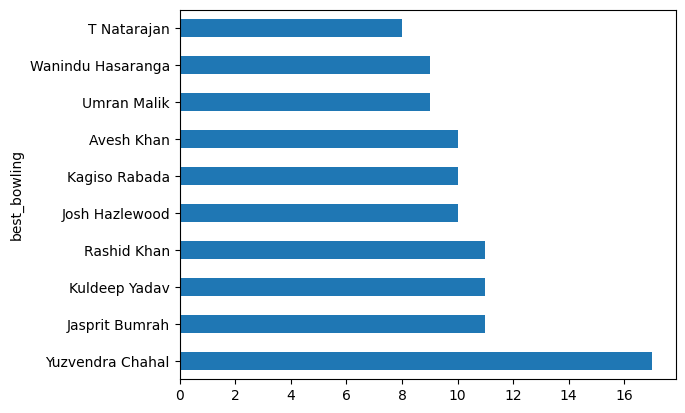

In [84]:
IPL2022_df['highest_wickets'] = IPL2022_df['best_bowling_figure'].apply(lambda x :x.split('--')[0])
IPL2022_df['highest_wickets'] = IPL2022_df['highest_wickets'].astype(int)
top_bowlers = IPL2022_df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(10)
top_bowlers.plot(kind = 'barh')

# **Questions on Venue Analysis:**

## **1. Most Matches Played by Venue:**

In [85]:
venue_count = IPL2022_df['venue'].value_counts()
venue_count

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

<Axes: ylabel='venue'>

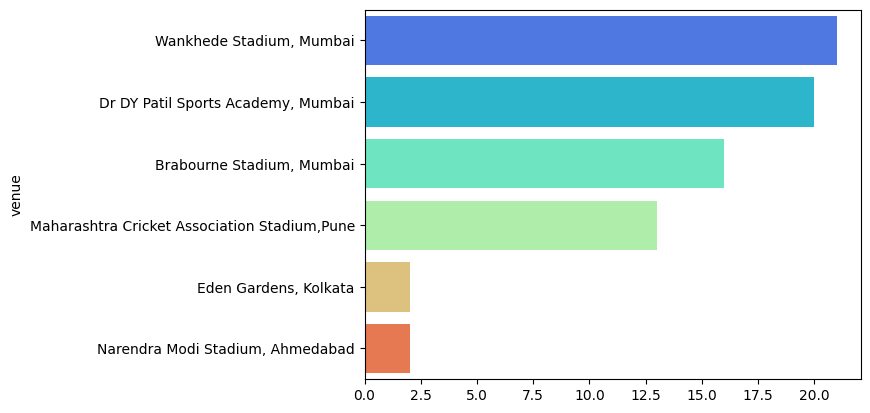

In [86]:
sns.barplot(y = venue_count.index,x = venue_count.values,palette='rainbow')

# **Custom Questions & Insights**
## **Q1: Who won the highest margin by runs?**

In [87]:
IPL2022_df[IPL2022_df['won_by'] == 'Runs'].sort_values(by = 'margin',ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91


## **Q2: Which player had the highest individual score?**

In [88]:
IPL2022_df[IPL2022_df['highscore'] == IPL2022_df['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


## **Q3: Which bowler had the best bowling figures?**

In [89]:
IPL2022_df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wickets
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,...,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59,2
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,...,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25,3
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,...,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22,3


In [90]:
IPL2022_df[IPL2022_df['highest_wickets'] == IPL2022_df['highest_wickets'].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
